In [2]:
!pip install spectral
!pip install rasterio
!pip install earthpy

In [3]:
from spectral import imshow
import matplotlib.pyplot as plt 
import earthpy.plot as ep 
import earthpy.spatial as es 
import rasterio 
from rasterio.plot import show 
import numpy as np 
import glob


In [4]:
b1_1 = rasterio.open('/content/Bandas/LO82170762021236CUB00_B1.TIF')
b2_1 = rasterio.open('/content/Bandas/LO82170762021236CUB00_B2.TIF')
b3_1 = rasterio.open('/content/Bandas/LO82170762021236CUB00_B3.TIF')
b4_1 = rasterio.open('/content/Bandas/LO82170762021236CUB00_B4.TIF')
b5_1 = rasterio.open('/content/Bandas/LO82170762021236CUB00_B5.TIF')
b6_1 = rasterio.open('/content/Bandas/LO82170762021236CUB00_B6.TIF')

In [5]:
b1 = b1_1.read(1)
b2 = b2_1.read(1)
b3 = b3_1.read(1)
b4 = b4_1.read(1)
b5 = b5_1.read(1)
b6 = b6_1.read(1)

stack = np.dstack([b1,b2,b3,b4,b5,b6])

#Visualização da banda três com a função stretch para expansão do histograma. Função baseada em percentil. 

ImageView object:
  Display bands       :  [0]
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 10324.0]
    G: [0.0, 10324.0]
    B: [0.0, 10324.0]

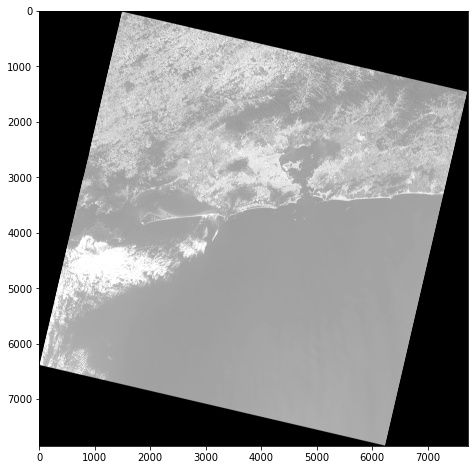

In [6]:
imshow(stack[:,:,3], stretch=(0.02,0.98), figsize= (12,8))

#Visualição de histogramas com a earthpy para depois expandi-los

: função da earthpy, que serve para leitura e visualização, recebe o caminho do arquivo. Porém, não é possível visualizar varias bandas em stack. Para isso tem uma maneira que gosto de utilizar. A ideia é criar uma lista com todos os caminhos em string. Para facilitar essa organização da lista exite uma biblioteca chamada Glob que reconhece os padroes da nomeclatura dos arquivos.

In [7]:
bandas_ep = [] 
for i in sorted(glob.glob('/content/Bandas/*[1-6].*')):
  bandas_ep.append(i)

obs: 1- A função sorted é para ordenar as pastas.

2- Esse "metodo" (*[1-6]*) serve para selecionar as bandas que tem o mesmo padrão do nome e que só altera o ultimo número. Dessa forma foi escolhido de 1 a 6

In [8]:
bandas_ep

['/content/Bandas/LO82170762021236CUB00_B1.TIF',
 '/content/Bandas/LO82170762021236CUB00_B2.TIF',
 '/content/Bandas/LO82170762021236CUB00_B3.TIF',
 '/content/Bandas/LO82170762021236CUB00_B4.TIF',
 '/content/Bandas/LO82170762021236CUB00_B5.TIF',
 '/content/Bandas/LO82170762021236CUB00_B6.TIF']

In [9]:
stack_ep, meta_data = es.stack(bandas_ep)

Visualização das bandas separadamente 

Obs: Essa função do earthpy não possui o parametro stretch. No earthpy tem um função com paramentro stretch que é a plotrgb. 

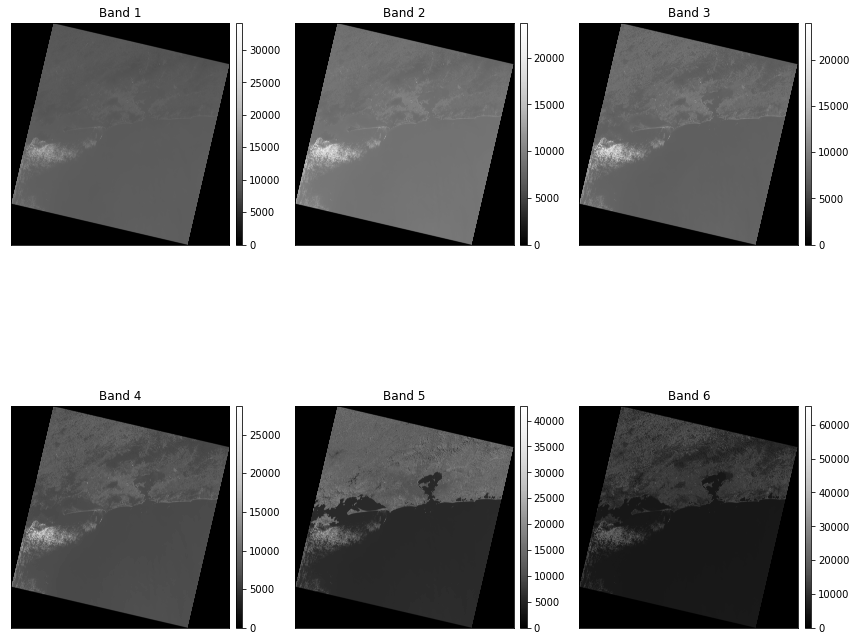

In [10]:
ep.plot_bands(stack_ep)
plt.show()

Visualização do histograma com earthpy

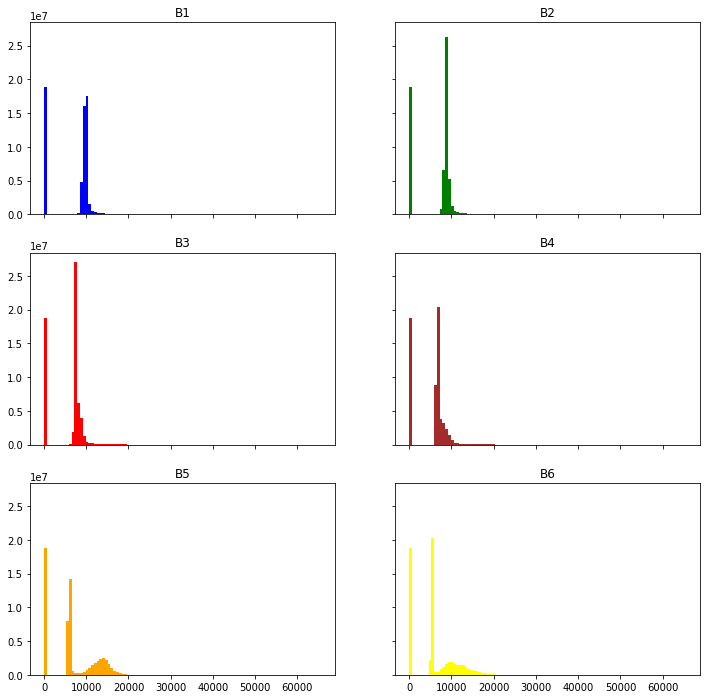

In [11]:
nome = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6']
colors = ['Blue', 'Green', 'Red', 'Brown', 'Orange', 'Yellow']
ep.hist(stack_ep, bins = 100, colors= colors ,title = nome)
plt.show()

Agora, gerando a mesma estrutura de visualização porém utilizando a matplotlib  

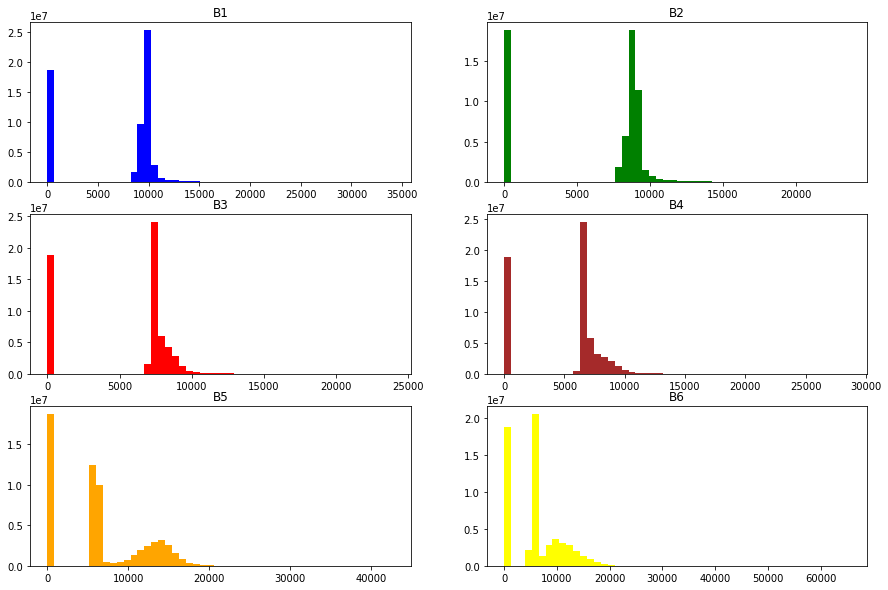

In [13]:
fig, axes = plt.subplots(3,2, figsize = (15,10))

axes = axes.ravel()
for i in range(stack.shape[2]):
  axes[i].hist(stack[:,:,i].flatten(), color = colors[i], bins = 50)
  axes[i].set_title(nome[i], fontsize=12)

Função de expansão usando a lógica de percentil passando uma função de transferência linear.  

In [15]:
def expansao(img, percent_min =2, percent_max =98):
  
  #gerando uma imagem com as mesmas dimenções da img recebida
  img2 = np.zeros_like(img)
  
  #variaveis que são dependentes de quantos bits é a img recebida, nesse caso é de 8, logo a sera de 0 a 255 
  x,y = 0,255 
  
  #colentando os percentis
  pmin = np.percentile(img, percent_min)
  pmax = np.percentile(img, percent_max)
  
  #função de transfêrencia linear
  f = x + (img - pmin) * (y - x) / (pmax - pmin)
  f[f<x] = x 
  f[f>y] = y
  img2 = f 
  
  return img2 

In [20]:
exp = np.zeros_like(stack)

In [29]:
for i in range(stack.shape[2]):
  exp[:,:,i] = expansao(stack[:,:,i])
  

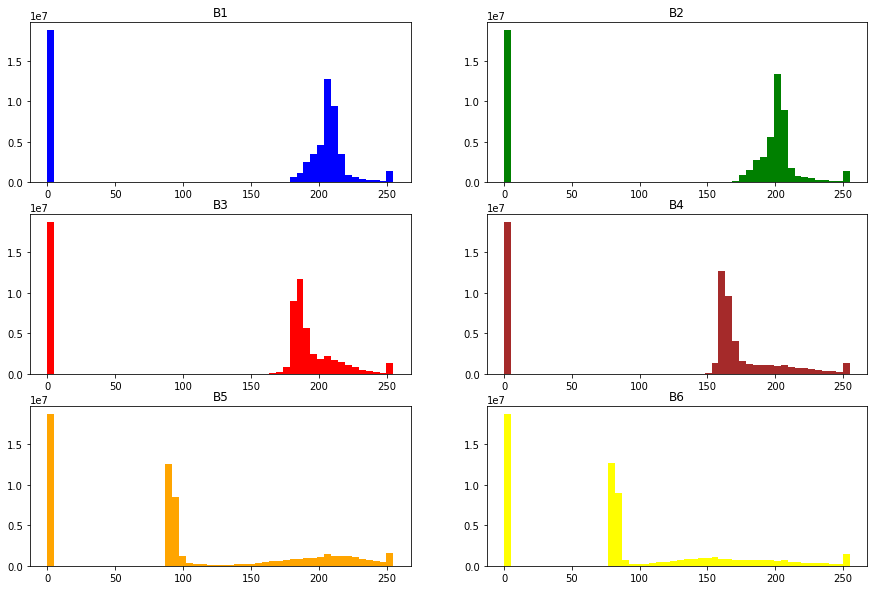

In [27]:
fig2, axes2 = plt.subplots(3,2, figsize = (15,10))

axes2 = axes2.ravel()
for i in range(stack.shape[2]):
  axes2[i].hist(exp[:,:,i].flatten(), color = colors[i], bins = 50)
  axes2[i].set_title(nome[i], fontsize=12)